Create an algorithm to do the following:

You will be provided with an RGB image of the figure (shown here ->),

called japanese-cherry.png


(Do not forget to load any required packages)

Inside the script:

(d)     Which filtering method worked best to remove noise while preserving the red tree and why?

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(a)      Read and display the image in a named window called “Output”

In [2]:
img = cv2.imread('japanese-cherry.jpg')

In [ ]:
while 1:
    cv2.imshow('Output',img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()

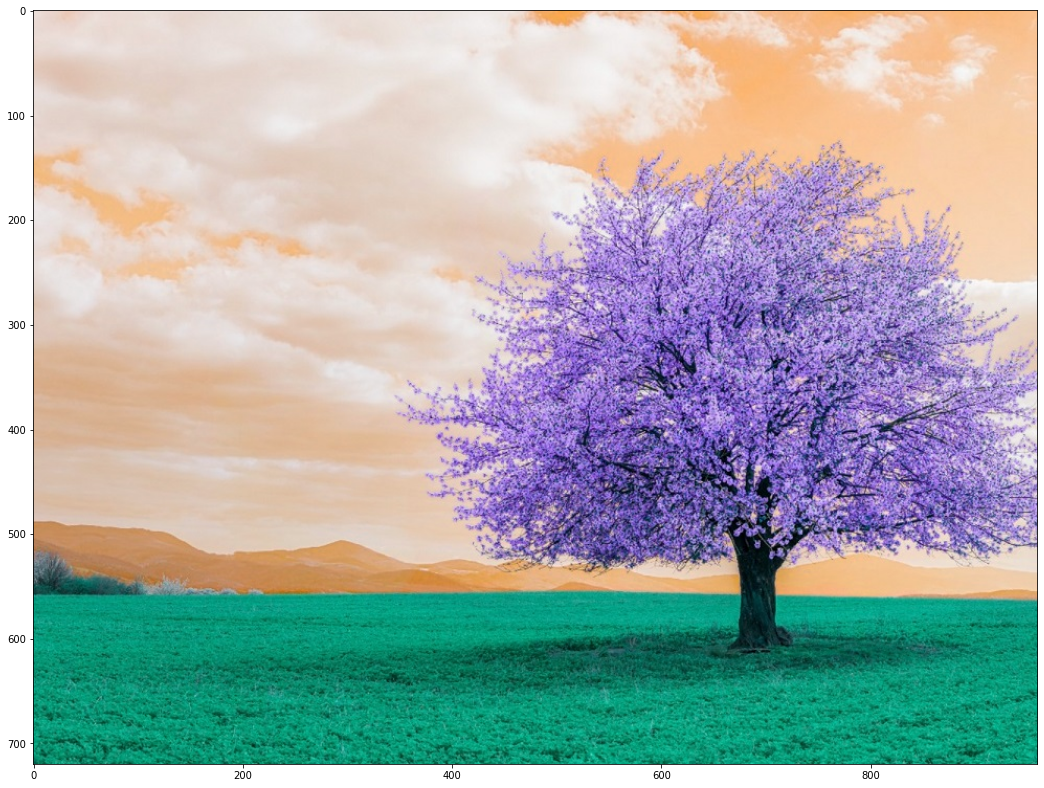

In [3]:
plt.figure(figsize=(18, 18))
plt.imshow(img)
plt.show()

(b)      Apply random noise to the image on all channels (RGB) with a mean = 10 and a sigma = 30

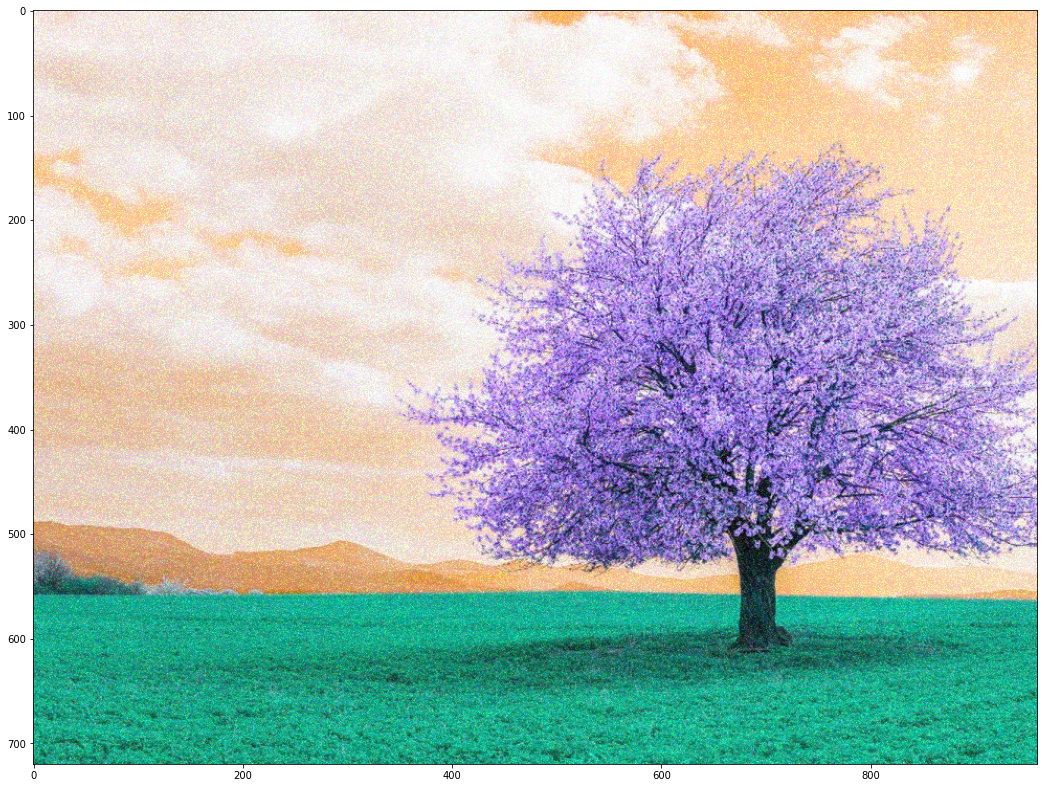

In [4]:
im = np.zeros(img.shape, np.uint8)
mean = 10, 10, 10
sigma = 30, 30, 30

cv2.randn(im, mean, sigma)
imgNoise = cv2.add(img, im)

plt.figure(figsize=(18, 18))
plt.imshow(imgNoise)
plt.show()

(c)       Implement 2 different methods  of noise removal (Gaussian blur and Bilateral filter) and display the results in two separate output windows as follows:

    (i)  Create a trackbar to change in realtime the kernel size of the Gaussian blur. Remember to consider only ODD numbered kernels (e.g. 3, 5, 7, 9).
    Set sigma to a constant of 0.

    (ii)     Create a trackbar to change in realtime the diameter (d) parameter of the Bilateral filter.  Set sigmacolor and sigmaspace to 100.

In [14]:
def do_nothing(_):
    pass

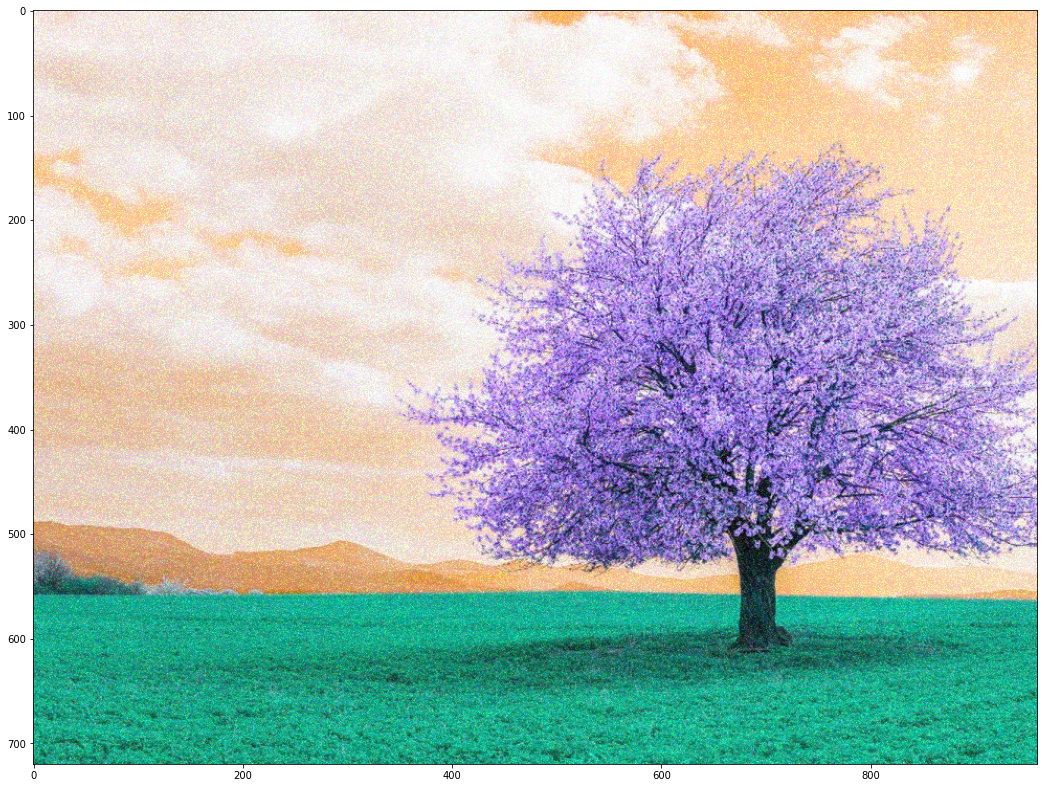

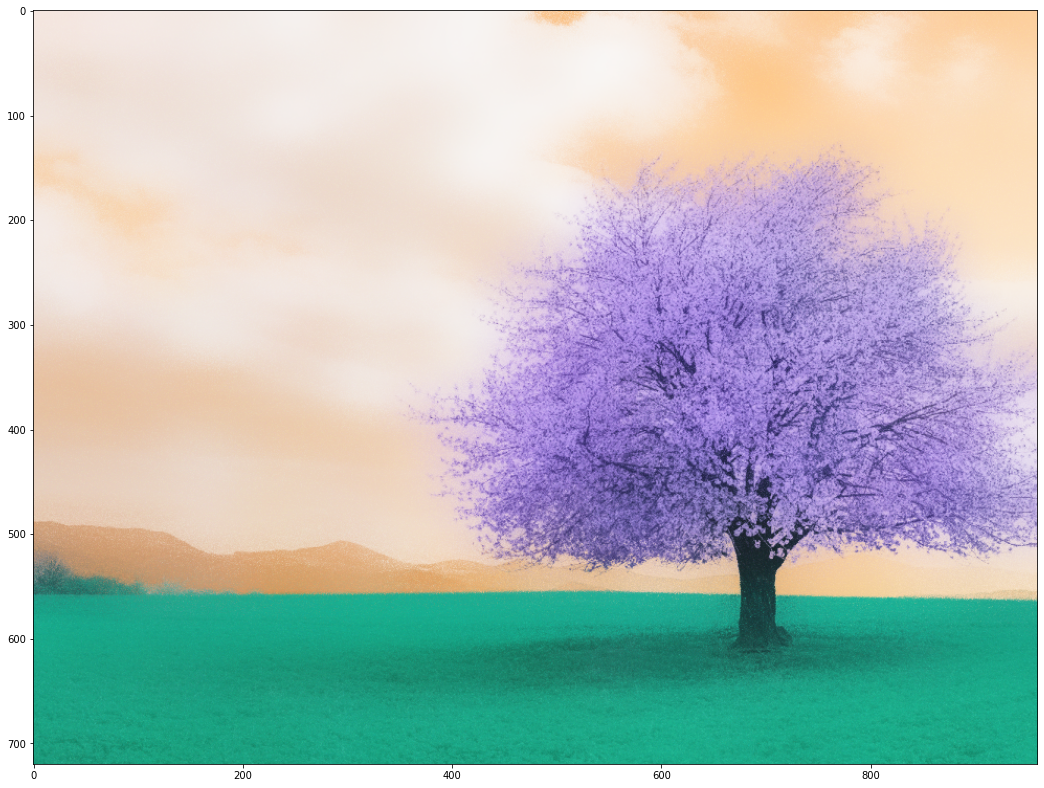

In [15]:
cv2.namedWindow('Gaussian')
cv2.namedWindow('Bilateral')
cv2.namedWindow('Sliders')

cv2.createTrackbar('Gaussian', 'Sliders', 1, 101, do_nothing)
cv2.createTrackbar('Bilateral', 'Sliders', 1, 101, do_nothing)

while 1:
    kSize = cv2.getTrackbarPos('Gaussian', 'Sliders')
    if kSize % 2 != 0:
        imgGaussian = cv2.GaussianBlur(src=imgNoise, ksize=(kSize, kSize), sigmaX=0, sigmaY=0)
    cv2.imshow('Gaussian', imgGaussian)

    diameter = cv2.getTrackbarPos('Bilateral', 'Sliders')
    imgBilateral = cv2.bilateralFilter(imgNoise, diameter, 100, 100)
    cv2.imshow('Bilateral', imgBilateral)

    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()

plt.figure(figsize=(18, 18))
plt.imshow(imgGaussian)
plt.show()

plt.figure(figsize=(18, 18))
plt.imshow(imgBilateral)

plt.show()